In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente4/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

49606

In [6]:
with open('dataset/generado/paciente4/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

49606

In [8]:
with open('dataset/generado/paciente4/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

6201

In [10]:
with open('dataset/generado/paciente4/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

6201

In [12]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

6201

In [14]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

6201

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/vanilla_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 40s 25ms/step - loss: 0.0094 - mae: 0.0739 - mse: 0.0094 - val_loss: 0.0051 - val_mae: 0.0545 - val_mse: 0.0051
Epoch 2/50
1551/1551 [==============================] - 30s 20ms/step - loss: 0.0052 - mae: 0.0553 - mse: 0.0052 - val_loss: 0.0041 - val_mae: 0.0501 - val_mse: 0.0041
Epoch 3/50
1551/1551 [==============================] - 37s 24ms/step - loss: 0.0040 - mae: 0.0486 - mse: 0.0040 - val_loss: 0.0038 - val_mae: 0.0486 - val_mse: 0.0038
Epoch 4/50
1551/1551 [==============================] - 33s 21ms/step - loss: 0.0035 - mae: 0.0454 - mse: 0.0035 - val_loss: 0.0036 - val_mae: 0.0468 - val_mse: 0.0036
Epoch 5/50
1551/1551 [==============================] - 29s 19ms/step - loss: 0.0032 - mae: 0.0432 - mse: 0.0032 - val_loss: 0.0037 - val_mae: 0.0475 - val_mse: 0.0037
Epoch 6/50
1551/1551 [==============================] - 27s 17ms/step - loss: 0.0031 - mae: 0.0421 - mse: 0.0031 - val_loss: 0.0029 - val_mae: 0.0420 - val_mse:

194/194 [==============================] - 1s 7ms/step - loss: 0.0036 - mae: 0.0458 - mse: 0.0036
test loss, test acc: [0.0036193039268255234, 0.04582504555583, 0.0036193039268255234]


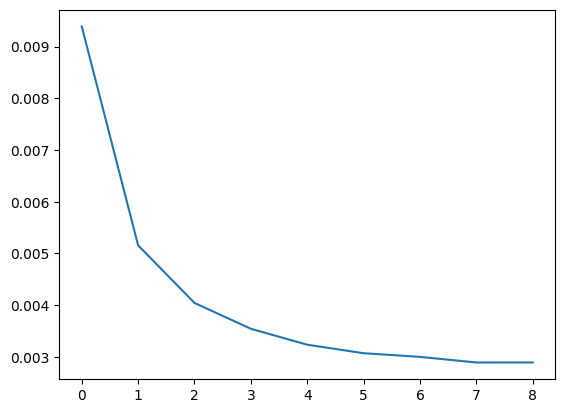

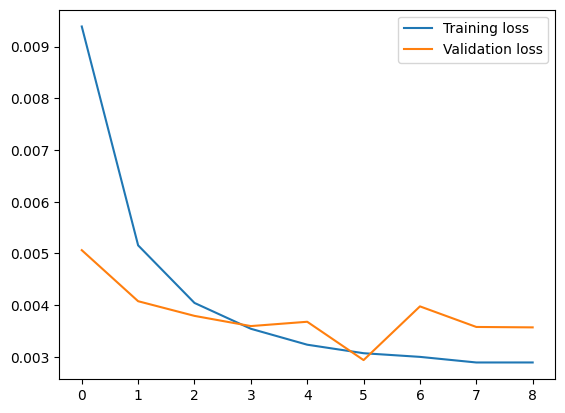

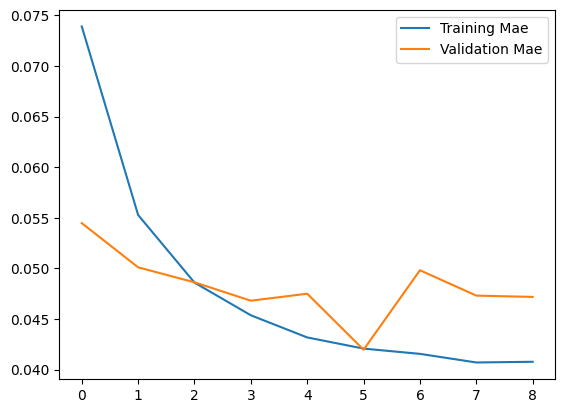

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 5ms/step


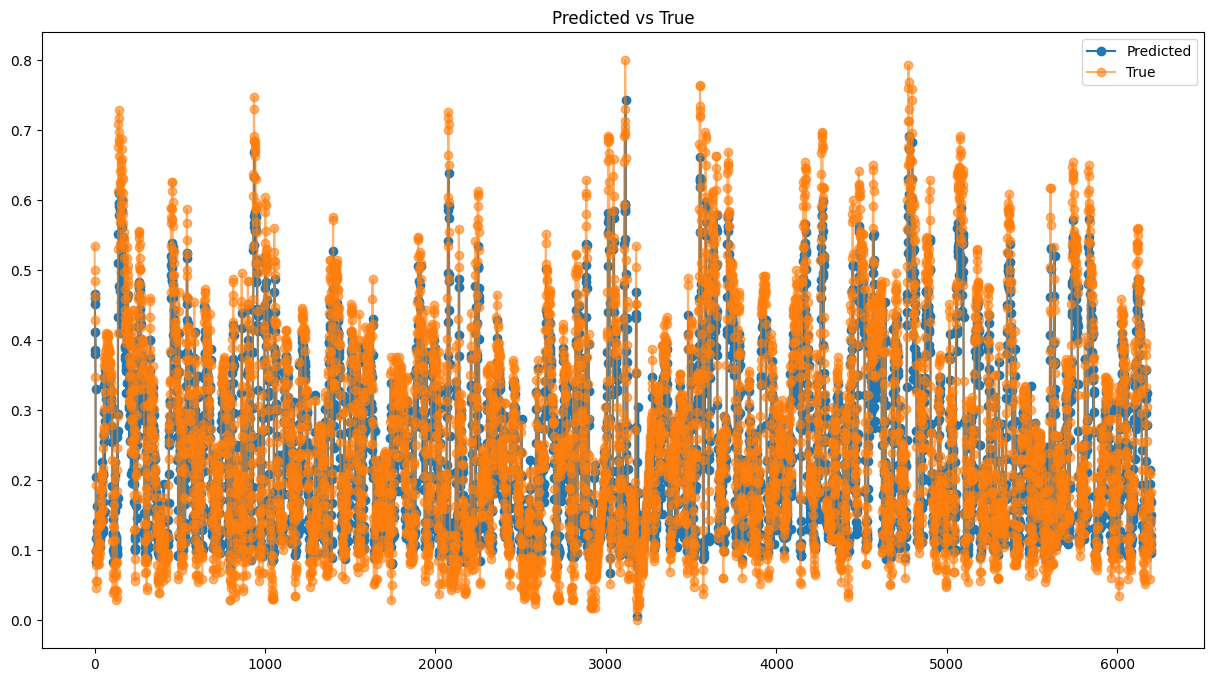

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04582503902480089,
 'mse': 0.0601606577126006,
 'rmse': 0.0036193047364126906}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/vanilla_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 28s 17ms/step - loss: 0.0060 - mae: 0.0586 - mse: 0.0060 - val_loss: 0.0040 - val_mae: 0.0466 - val_mse: 0.0040
Epoch 2/50
1551/1551 [==============================] - 26s 17ms/step - loss: 0.0031 - mae: 0.0420 - mse: 0.0031 - val_loss: 0.0028 - val_mae: 0.0389 - val_mse: 0.0028
Epoch 3/50
1551/1551 [==============================] - 26s 17ms/step - loss: 0.0025 - mae: 0.0371 - mse: 0.0025 - val_loss: 0.0025 - val_mae: 0.0367 - val_mse: 0.0025
Epoch 4/50
1551/1551 [==============================] - 27s 17ms/step - loss: 0.0023 - mae: 0.0354 - mse: 0.0023 - val_loss: 0.0023 - val_mae: 0.0355 - val_mse: 0.0023
Epoch 5/50
1551/1551 [==============================] - 26s 17ms/step - loss: 0.0022 - mae: 0.0347 - mse: 0.0022 - val_loss: 0.0023 - val_mae: 0.0349 - val_mse: 0.0023
Epoch 6/50
1551/1551 [==============================] - 29s 19ms/step - loss: 0.0022 - mae: 0.0344 - mse: 0.0022 - val_loss: 0.0022 - val_mae: 0.0346 - val_mse:

194/194 [==============================] - 1s 7ms/step - loss: 0.0024 - mae: 0.0353 - mse: 0.0024
test loss, test acc: [0.0024491799995303154, 0.035317085683345795, 0.0024491799995303154]


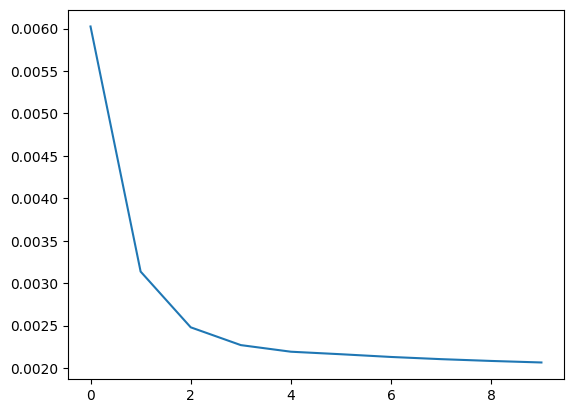

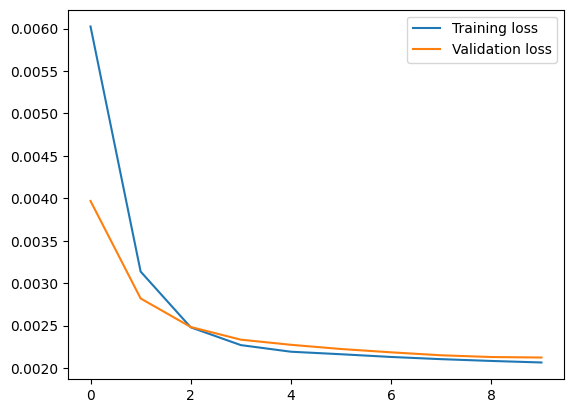

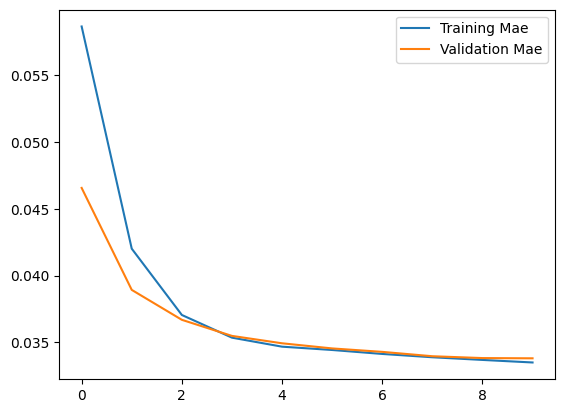

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 6ms/step


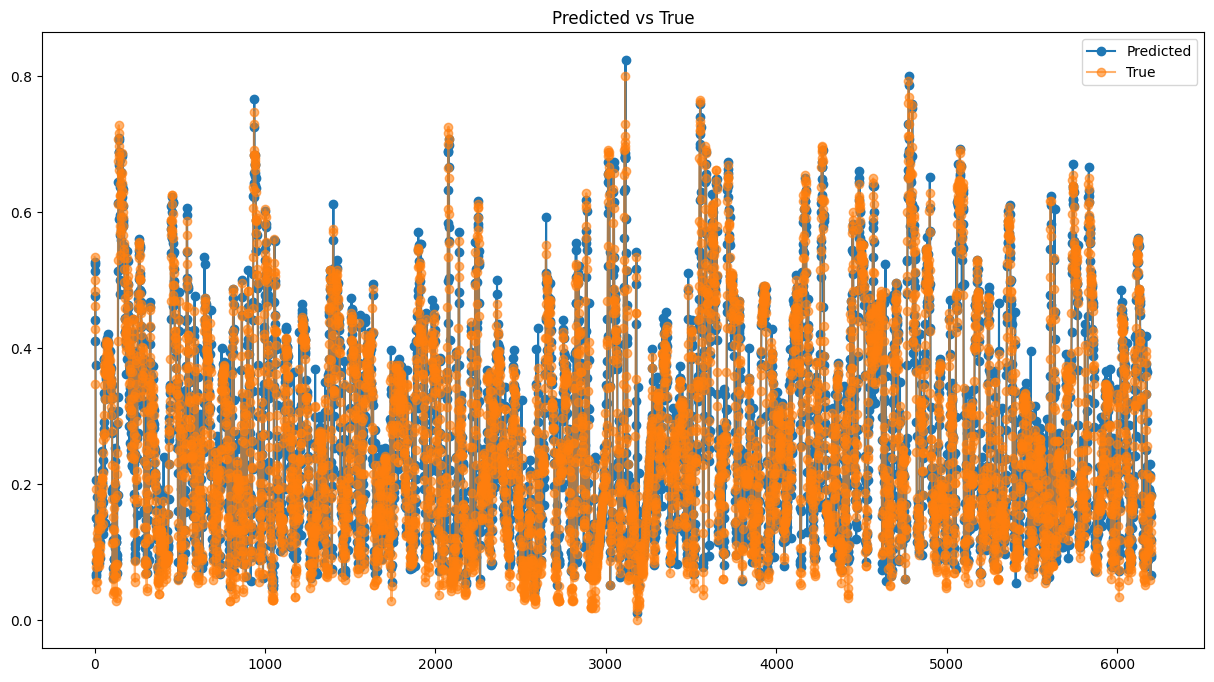

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.035317084403434285,
 'mse': 0.049489191228392085,
 'rmse': 0.00244918004844036}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/stacked_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 55s 34ms/step - loss: 0.0103 - mae: 0.0773 - mse: 0.0103 - val_loss: 0.0054 - val_mae: 0.0569 - val_mse: 0.0054
Epoch 2/50
1551/1551 [==============================] - 53s 34ms/step - loss: 0.0048 - mae: 0.0532 - mse: 0.0048 - val_loss: 0.0047 - val_mae: 0.0547 - val_mse: 0.0047
Epoch 3/50
1551/1551 [==============================] - 53s 34ms/step - loss: 0.0036 - mae: 0.0460 - mse: 0.0036 - val_loss: 0.0032 - val_mae: 0.0436 - val_mse: 0.0032
Epoch 4/50
1551/1551 [==============================] - 52s 34ms/step - loss: 0.0032 - mae: 0.0431 - mse: 0.0032 - val_loss: 0.0035 - val_mae: 0.0460 - val_mse: 0.0035
Epoch 5/50
1551/1551 [==============================] - 54s 35ms/step - loss: 0.0030 - mae: 0.0418 - mse: 0.0030 - val_loss: 0.0039 - val_mae: 0.0487 - val_mse: 0.0039
Epoch 6/50
1551/1551 [==============================] - 53s 34ms/step - loss: 0.0030 - mae: 0.0417 - mse: 0.0030 - val_loss: 0.0045 - val_mae: 0.0529 - val_mse:

194/194 [==============================] - 2s 11ms/step - loss: 0.0045 - mae: 0.0506 - mse: 0.0045
test loss, test acc: [0.004468970932066441, 0.050594959408044815, 0.004468970932066441]


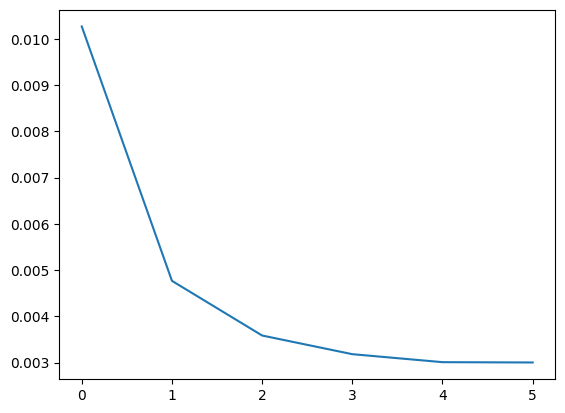

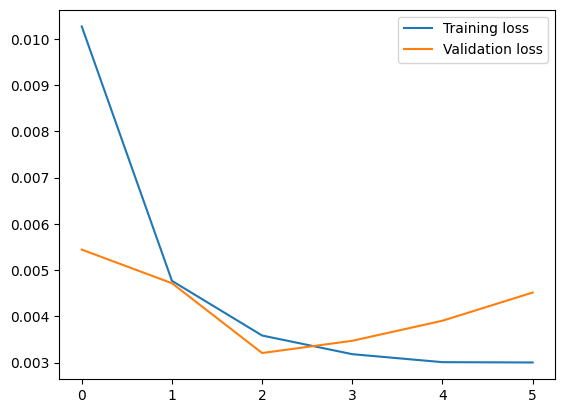

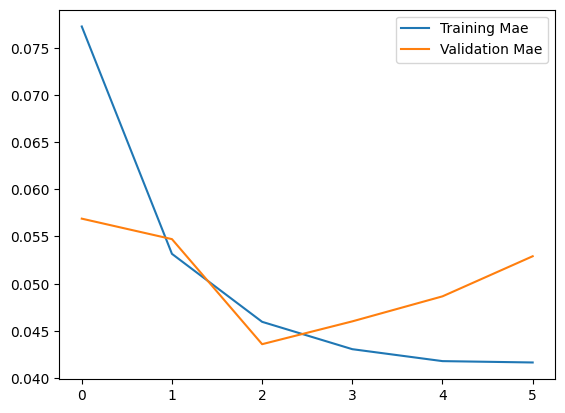

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 10ms/step


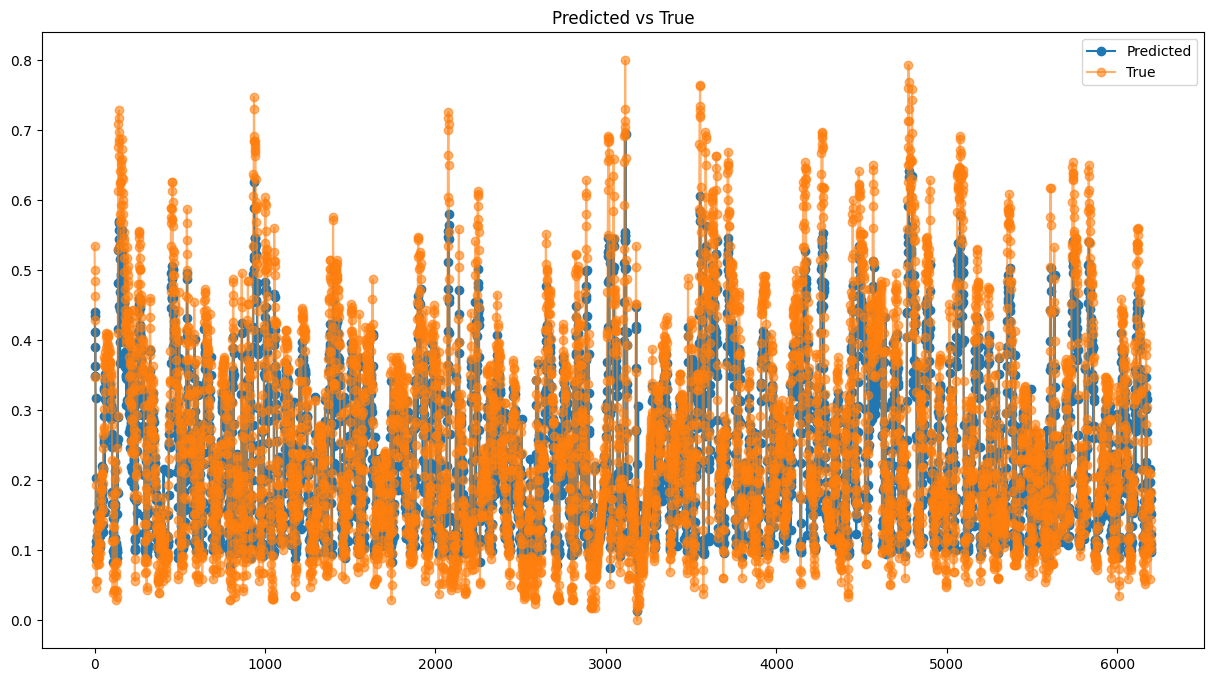

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.05059496310426179,
 'mse': 0.06685035123537042,
 'rmse': 0.004468969460292392}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/stacked_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 56s 34ms/step - loss: 0.0080 - mae: 0.0675 - mse: 0.0080 - val_loss: 0.0039 - val_mae: 0.0468 - val_mse: 0.0039
Epoch 2/50
1551/1551 [==============================] - 52s 33ms/step - loss: 0.0030 - mae: 0.0412 - mse: 0.0030 - val_loss: 0.0027 - val_mae: 0.0388 - val_mse: 0.0027
Epoch 3/50
1551/1551 [==============================] - 52s 33ms/step - loss: 0.0023 - mae: 0.0356 - mse: 0.0023 - val_loss: 0.0023 - val_mae: 0.0354 - val_mse: 0.0023
Epoch 4/50
1551/1551 [==============================] - 51s 33ms/step - loss: 0.0022 - mae: 0.0350 - mse: 0.0022 - val_loss: 0.0023 - val_mae: 0.0351 - val_mse: 0.0023
Epoch 5/50
1551/1551 [==============================] - 52s 33ms/step - loss: 0.0022 - mae: 0.0346 - mse: 0.0022 - val_loss: 0.0023 - val_mae: 0.0348 - val_mse: 0.0023
Epoch 6/50
1551/1551 [==============================] - 51s 33ms/step - loss: 0.0021 - mae: 0.0344 - mse: 0.0021 - val_loss: 0.0022 - val_mae: 0.0341 - val_mse:

194/194 [==============================] - 2s 8ms/step - loss: 0.0024 - mae: 0.0353 - mse: 0.0024
test loss, test acc: [0.002438552211970091, 0.035324133932590485, 0.002438552211970091]


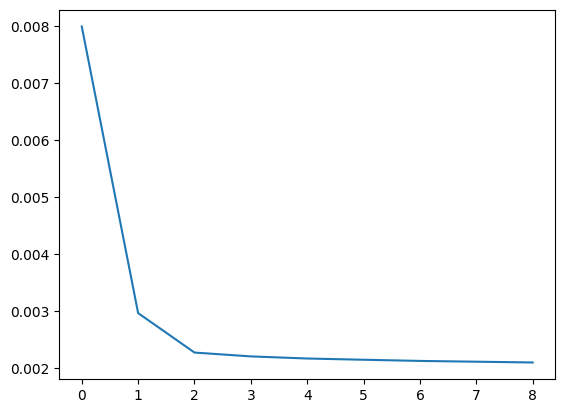

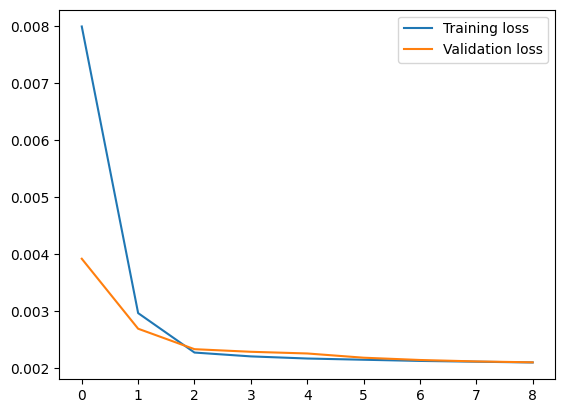

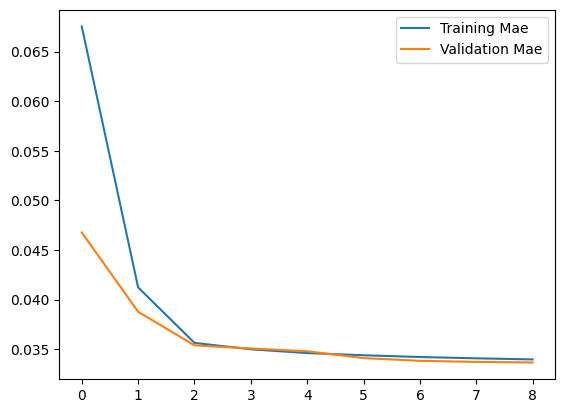

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 2s 9ms/step


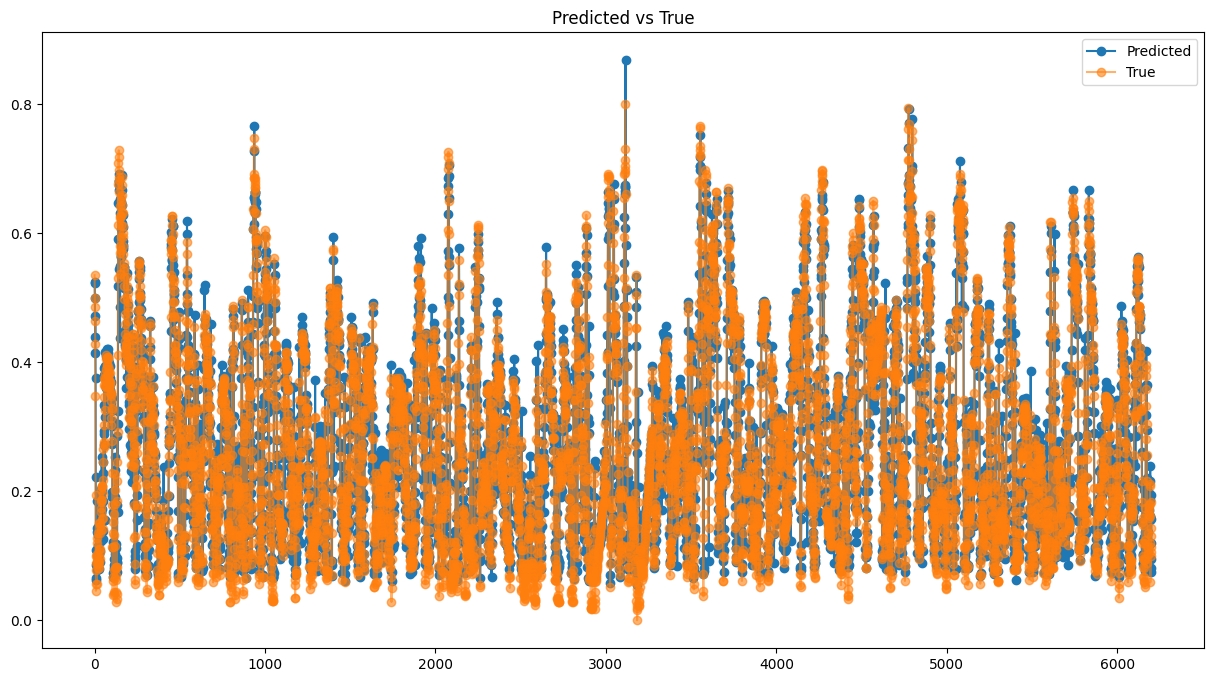

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03532414074736366,
 'mse': 0.04938169676307439,
 'rmse': 0.002438551975200232}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/bidirectional_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 42s 25ms/step - loss: 0.0086 - mae: 0.0710 - mse: 0.0086 - val_loss: 0.0046 - val_mae: 0.0514 - val_mse: 0.0046
Epoch 2/50
1551/1551 [==============================] - 26s 17ms/step - loss: 0.0046 - mae: 0.0519 - mse: 0.0046 - val_loss: 0.0039 - val_mae: 0.0481 - val_mse: 0.0039
Epoch 3/50
1551/1551 [==============================] - 19s 12ms/step - loss: 0.0037 - mae: 0.0464 - mse: 0.0037 - val_loss: 0.0034 - val_mae: 0.0451 - val_mse: 0.0034
Epoch 4/50
1551/1551 [==============================] - 19s 12ms/step - loss: 0.0033 - mae: 0.0440 - mse: 0.0033 - val_loss: 0.0031 - val_mae: 0.0433 - val_mse: 0.0031
Epoch 5/50
1551/1551 [==============================] - 20s 13ms/step - loss: 0.0032 - mae: 0.0428 - mse: 0.0032 - val_loss: 0.0033 - val_mae: 0.0447 - val_mse: 0.0033
Epoch 6/50
1551/1551 [==============================] - 20s 13ms/step - loss: 0.0030 - mae: 0.0418 - mse: 0.0030 - val_loss: 0.0033 - val_mae: 0.0446 - val_mse:

194/194 [==============================] - 1s 5ms/step - loss: 0.0032 - mae: 0.0423 - mse: 0.0032
test loss, test acc: [0.003221880877390504, 0.042302146553993225, 0.003221880877390504]


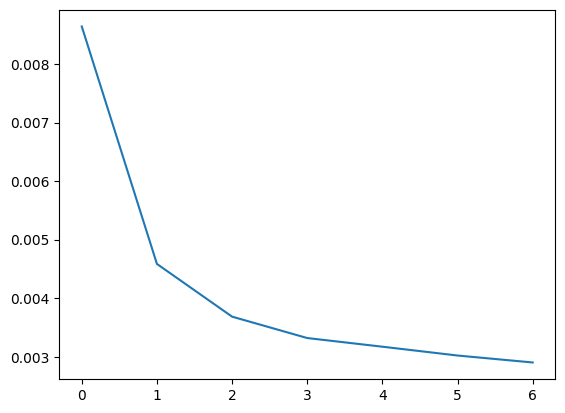

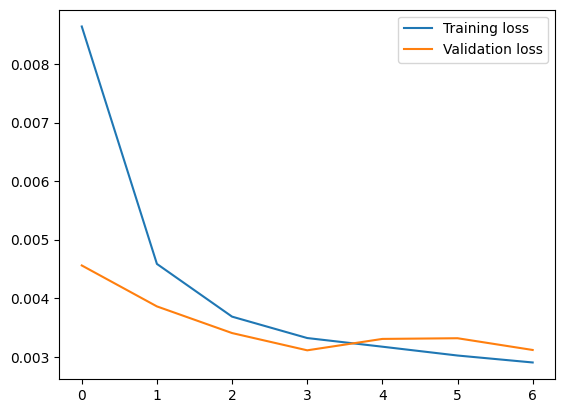

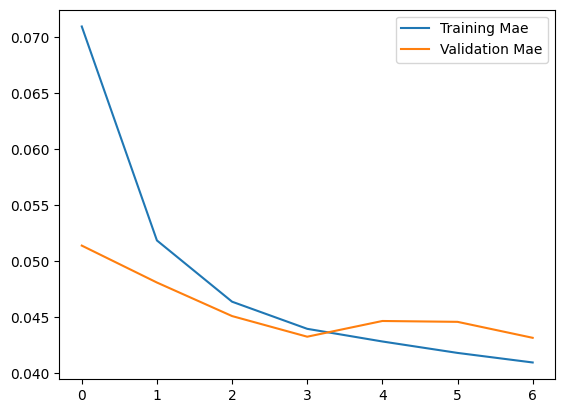

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 4ms/step


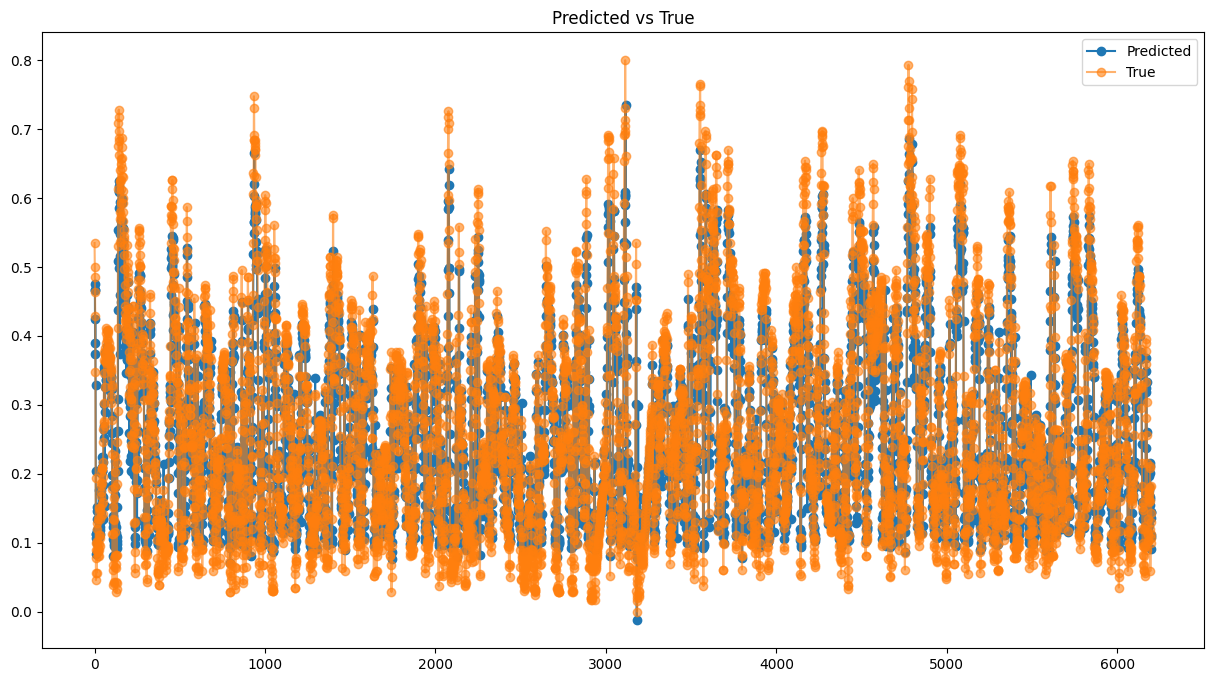

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04230214267352765,
 'mse': 0.056761601935332716,
 'rmse': 0.0032218794542651667}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente4/bidirectional_NO_dropout.h5')

Epoch 1/50
1551/1551 [==============================] - 23s 13ms/step - loss: 0.0064 - mae: 0.0603 - mse: 0.0064 - val_loss: 0.0039 - val_mae: 0.0465 - val_mse: 0.0039
Epoch 2/50
1551/1551 [==============================] - 20s 13ms/step - loss: 0.0030 - mae: 0.0412 - mse: 0.0030 - val_loss: 0.0026 - val_mae: 0.0378 - val_mse: 0.0026
Epoch 3/50
1551/1551 [==============================] - 20s 13ms/step - loss: 0.0024 - mae: 0.0363 - mse: 0.0024 - val_loss: 0.0024 - val_mae: 0.0356 - val_mse: 0.0024
Epoch 4/50
1551/1551 [==============================] - 20s 13ms/step - loss: 0.0022 - mae: 0.0352 - mse: 0.0022 - val_loss: 0.0023 - val_mae: 0.0348 - val_mse: 0.0023
Epoch 5/50
1551/1551 [==============================] - 20s 13ms/step - loss: 0.0022 - mae: 0.0346 - mse: 0.0022 - val_loss: 0.0022 - val_mae: 0.0344 - val_mse: 0.0022
Epoch 6/50
1551/1551 [==============================] - 21s 14ms/step - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - val_loss: 0.0022 - val_mae: 0.0341 - val_mse:

194/194 [==============================] - 1s 6ms/step - loss: 0.0025 - mae: 0.0358 - mse: 0.0025
test loss, test acc: [0.002484397031366825, 0.035772569477558136, 0.002484397031366825]


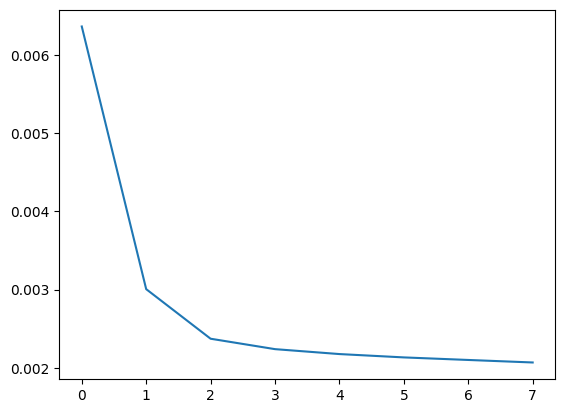

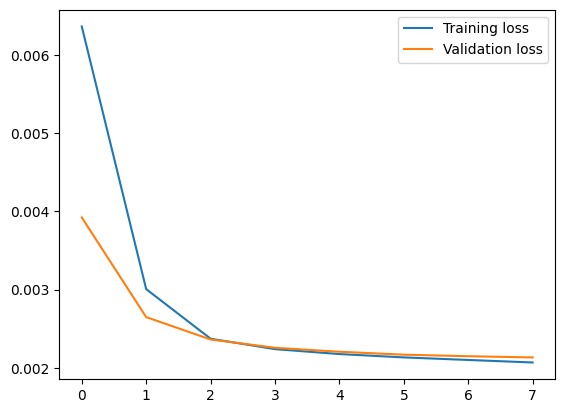

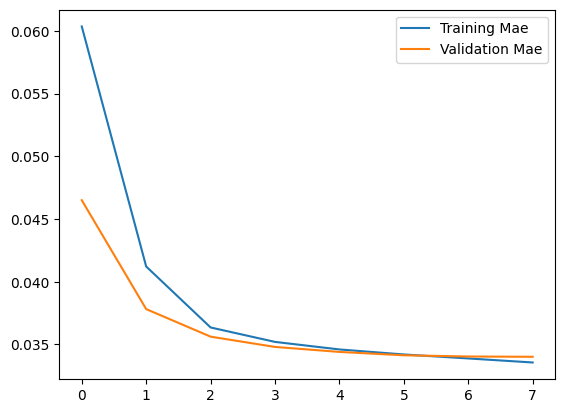

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

194/194 [==============================] - 1s 5ms/step


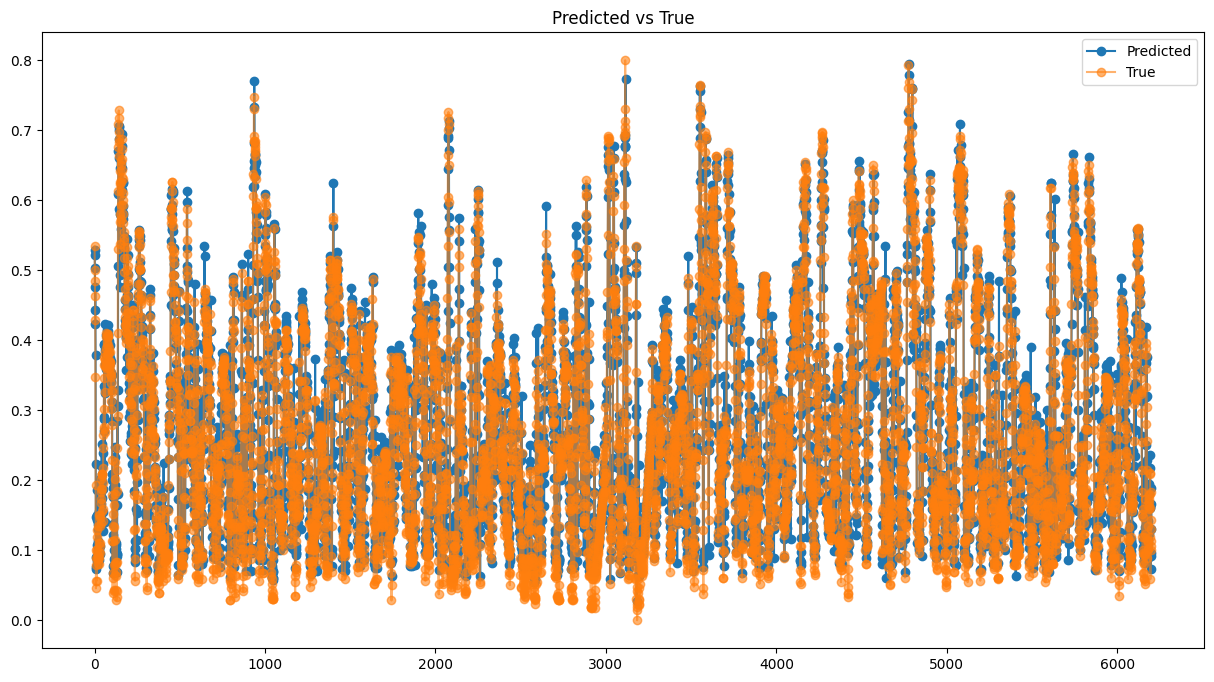

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03577256786316004,
 'mse': 0.049843724848820554,
 'rmse': 0.0024843969068049318}